In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

In [33]:
df = pd.read_csv("../data/emails.csv",index_col=False)
df = df.drop(columns=["Unnamed: 0"])

df.columns

Index(['message_id', 'text', 'label', 'label_text', 'subject', 'message',
       'date'],
      dtype='object')

In [34]:
df.shape

(31716, 7)

In [35]:
df[:5]

,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


In [36]:
df.dtypes

message_id     int64
text          object
label          int64
label_text    object
subject       object
message       object
date          object
dtype: object

---
Detect Duplicate Values

In [37]:
# df.duplicated()
# no duplicate values

df = df.drop_duplicates()

---
null values

In [38]:
df.isnull().sum()

message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

In [39]:

# null values percentage
total = df.size
null_vaues = df.isnull().sum().sum()
per = ((null_vaues ) / total) * 100

print("total dataset : ",total)
print("total null value : ",null_vaues)
print("null values percentage : ",per)

total dataset :  222012
total null value :  670
null values percentage :  0.3017854890726627


In [40]:
# null rows
df[df.isnull().any(axis=1)]


,message_id,text,label,label_text,subject,message,date
173,20992,participate now & receive a las vegas vacation...,1,spam,participate now & receive a las vegas vacation...,NaN,2005-01-16
207,21255,re [ 11 ] :,1,spam,re [ 11 ] :,NaN,2005-02-14
218,20541,NaN,1,spam,NaN,NaN,2004-11-30
536,14604,http : / / albertapower . enron . com / xnav /...,0,ham,http : / / albertapower . enron . com / xnav /...,NaN,2002-01-05
554,30279,"your mortgage process is pre - approved , for ...",1,spam,NaN,"your mortgage process is pre - approved , for ...",2004-11-05
...,...,...,...,...,...,...,...
31504,31826,"ninety ,\nxanaax , \ / alium , cialiis , \ / i...",1,spam,NaN,"ninety ,\nxanaax , \ / alium , cialiis , \ / i...",2005-02-16
31541,30976,super cheaap softwares & shiiip to all countri...,1,spam,NaN,super cheaap softwares & shiiip to all countri...,2004-12-26
31569,13880,louise - you approved redmond hiring his curre...,0,ham,louise - you approved redmond hiring his curre...,NaN,2001-11-12
31577,31849,"whqfy pay f , ojr po ] rn ? ?\nas a limited ti...",1,spam,NaN,"whqfy pay f , ojr po ] rn ? ?\nas a limited ti...",2005-02-18


In [41]:
# drop all cols exept text and label

col_to_drop = ["message_id","date","subject","message"]

col_to_drop = [col for col in col_to_drop if col in df.columns]

df = df.drop(columns=col_to_drop)

df


,text,label,label_text
0,any software just for 15 $ - 99 $ understandin...,1,spam
1,perspective on ferc regulatory action client c...,0,ham
2,wanted to try ci 4 lis but thought it was way ...,1,spam
3,"enron / hpl actuals for december 11 , 2000 tec...",0,ham
4,looking for cheap high - quality software ? ro...,1,spam
...,...,...,...
31711,"credit netco start up plan louise ,\nattached ...",0,ham
31712,"everything you are looking for hello , visit o...",1,spam
31713,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,0,ham
31714,corhshucker daren - - - -\nthe invoices are be...,0,ham


In [42]:

df["text"] = df["text"].fillna("MISSING")

print(df.isnull().sum())


text          0
label         0
label_text    0
dtype: int64


---
### Check if class are balanced

Class A: 15,553

Class B: 16,163

Difference = 16,163 − 15,553 = 610

Percentage difference: 610 / 16000 = 3.8%

A dataset is considered balanced if the class ratio is within 10–20% difference.

so the dataset is balened

In [43]:
df.groupby("label_text")["label_text"].count()

label_text
ham     15553
spam    16163
Name: label_text, dtype: int64

---
### WordClouds

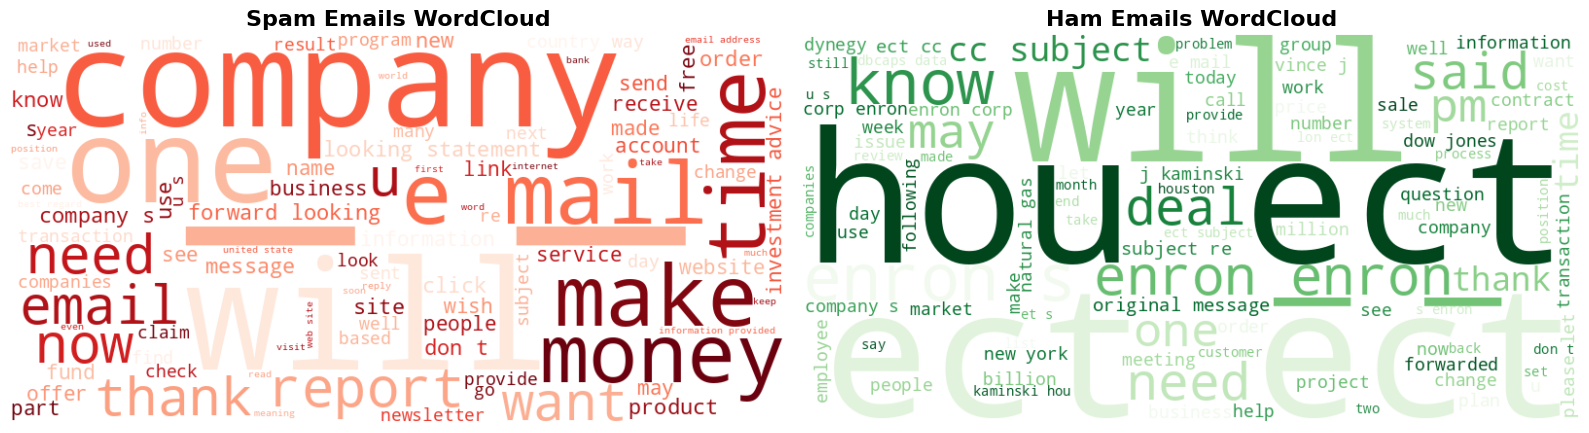

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text for each class
spam_text = " ".join(df[df["label_text"] == "spam"]["text"].tolist()) 
ham_text = " ".join(df[df["label_text"] == "ham"]["text"].tolist()) 

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Spam WordCloud
wc_spam = WordCloud(width=800, height=400, background_color="white", 
                     colormap="Reds", max_words=100).generate(spam_text)
axes[0].imshow(wc_spam, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Spam Emails WordCloud", fontsize=16, fontweight='bold')

# Ham WordCloud
wc_ham = WordCloud(width=800, height=400, background_color="white", 
                    colormap="Greens", max_words=100).generate(ham_text)
axes[1].imshow(wc_ham, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Ham Emails WordCloud", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()



In [45]:

os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/data.csv", index=False)
